In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()
df.info

<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [4]:
x= cdf.iloc[:, :-1].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5 33. ]
 [ 2.4  4.  11.2  7.7  9.6 29. ]
 [ 1.5  4.   6.   5.8  5.9 48. ]
 ...
 [ 3.   6.  13.4  9.8 11.8 24. ]
 [ 3.2  6.  12.9  9.3 11.3 25. ]
 [ 3.2  6.  14.9 10.2 12.8 22. ]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

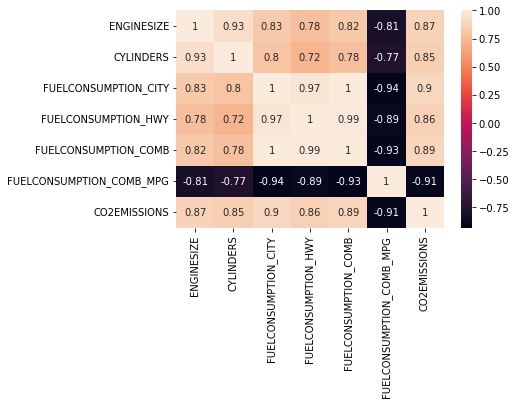

In [5]:
import seaborn as sns
sns.heatmap(cdf.corr(),annot=True)

In [6]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred= regressor.predict(x_test)
#Predicting the Training set result;
x_pred= regressor.predict(x_train)

In [9]:
print('Coefficients: ', regressor.coef_)
print(regressor.intercept_)

Coefficients:  [  7.93252962   8.25405928 -10.45268512  -4.44532011  18.67025929
  -3.84929985]
249.74814804436312


In [10]:
print('Residual sum squares: %.2f' % np.mean((y_pred - y_test) **2 ))

Residual sum squares: 493.01


In [11]:
print(regressor.score(x_test, y_test))

0.874333265448332


<AxesSubplot:>

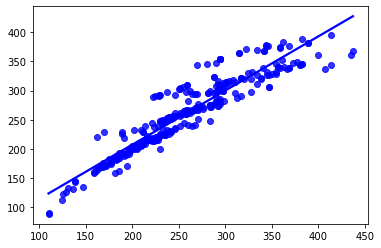

In [12]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

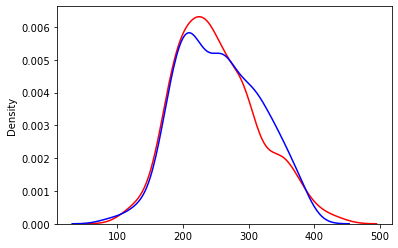

In [13]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [14]:
x= cdf.iloc[:, :3].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9]
 [ 2.4  4.  11.2]
 [ 1.5  4.   6. ]
 ...
 [ 3.   6.  13.4]
 [ 3.2  6.  12.9]
 [ 3.2  6.  14.9]]
[196 221 136 ... 271 260 294]


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred= regressor.predict(x_test)
print(regressor.score(x_test,y_test))


0.8418565610806696
